### Laboratorio 9 - Tutorial de Visualziación de Datos

Stefano Aragoni, Carol Arévalo, Luis Santos

---------

*Objetivos*:
- Familiarizarse con el Análisis Exploratorio de Datos (EDA) utilizando Python.
- Aprender a desarrollar y evaluar modelos de aprendizaje automático.
- Reflexionar sobre la aplicabilidad de estas habilidades en contextos profesionales.

*Conjunto de Datos*:
- Utilizaremos datos de la "Encuesta Nacional de Condiciones de Vida 2014" (ENCOVI) de Guatemala. Estos datos deben ser limpiados y preprocesados antes del análisis.

*Pregunta Científica*:
- ¿Podemos determinar el nivel de pobreza de una persona en Guatemala utilizando variables socioeconómicas?
    - Para esto, se crearán 2 modelos diferentes. En uno, se utilizarán las características de la vivienda y en el otro, las características de la persona. A través de esto, se espera poder determinar qué variables son más importantes para determinar el nivel de pobreza de una persona.

--------

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image
import pyreadstat
import math
from sklearn.preprocessing import LabelEncoder
# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization

#### **Parte 1: Análisis Exploratorio de Datos (40 Puntos)**

##### *Carga y Limpieza de Datos (10 puntos):*

Como primer paso, se debe cargar los datos y realizar una limpieza básica. Para esto, se recomienda seguir los siguientes pasos:

- Importar el conjunto de datos.
- Normalizar nombres de columnas.
- Identificar y tratar valores faltantes.


Como primer paso, como se puede observar a continuación, se <font color=orange>importa el conjunto de datos y se muestra la información de las columnas</font>. 

En este caso, en ambos archivos, se puede observar una gran cantidad de columnas. Asimismo, inicialmente se puede observar una gran cantidad de valores faltantes. Finalmente, cabe destacar que algunos nombres de columnas no son claros. Por lo tanto, sería relevante cambiarlos para que sean más claros y concisos.

In [83]:
# Cargar los datos desde el archivo .sav
df_hogar = pd.read_spss('./Datos_Lab/ENCOVI_Hogar.sav')

# Revisar los primeros registros para entender la estructura de los datos
df_hogar.head()

REGION      DEPTO    AREA  UPM  NUMHOG  FACTOR  FACTOR3  \
0  I. METROPOLITANA  Guatemala  Urbana  1.0     1.0   525.0   1575.0   
1  I. METROPOLITANA  Guatemala  Urbana  1.0     2.0   525.0   1575.0   
2  I. METROPOLITANA  Guatemala  Urbana  1.0     3.0   525.0   9450.0   
3  I. METROPOLITANA  Guatemala  Urbana  1.0     4.0   525.0   3150.0   
4  I. METROPOLITANA  Guatemala  Urbana  1.0     5.0   525.0   1575.0   

          POBREZA  THOGAR PPB01  ...  P01H10  P01H11  P01H12 P01H13  P01H14  \
0        No pobre     3.0    NO  ...     NaN     NaN     NaN    NaN     NaN   
1        No pobre     3.0    NO  ...     NaN     NaN     NaN    NaN     NaN   
2  Pobre no extr.    18.0    NO  ...      Si      Si      Si     Si      Si   
3  Pobre no extr.     6.0    NO  ...      No      No      No     No      No   
4        No pobre     3.0    NO  ...     NaN     NaN     NaN    NaN     NaN   

   P01H15  P01H16 DIA_ENC MES_ENC   A_ENC  
0     NaN     NaN    22.0  AGOSTO  2014.0  
1     NaN     NaN    27.0  AGOSTO  2014.0  
2      Si      Si    22.0  AGOSTO  2014.0  
3      No      No    24.0  AGOSTO  2014.0  
4     NaN     NaN    22.0  AGOSTO  2014.0  

[5 rows x 163 columns]

In [84]:
# Cargar los datos desde el archivo .sav
df_personas = pd.read_spss('./Datos_Lab/ENCOVI_Personas.sav')

# Revisar los primeros registros para entender la estructura de los datos
df_hogar.head()

REGION      DEPTO    AREA  UPM  NUMHOG  FACTOR  FACTOR3  \
0  I. METROPOLITANA  Guatemala  Urbana  1.0     1.0   525.0   1575.0   
1  I. METROPOLITANA  Guatemala  Urbana  1.0     2.0   525.0   1575.0   
2  I. METROPOLITANA  Guatemala  Urbana  1.0     3.0   525.0   9450.0   
3  I. METROPOLITANA  Guatemala  Urbana  1.0     4.0   525.0   3150.0   
4  I. METROPOLITANA  Guatemala  Urbana  1.0     5.0   525.0   1575.0   

          POBREZA  THOGAR PPB01  ...  P01H10  P01H11  P01H12 P01H13  P01H14  \
0        No pobre     3.0    NO  ...     NaN     NaN     NaN    NaN     NaN   
1        No pobre     3.0    NO  ...     NaN     NaN     NaN    NaN     NaN   
2  Pobre no extr.    18.0    NO  ...      Si      Si      Si     Si      Si   
3  Pobre no extr.     6.0    NO  ...      No      No      No     No      No   
4        No pobre     3.0    NO  ...     NaN     NaN     NaN    NaN     NaN   

   P01H15  P01H16 DIA_ENC MES_ENC   A_ENC  
0     NaN     NaN    22.0  AGOSTO  2014.0  
1     NaN     NaN    27.0  AGOSTO  2014.0  
2      Si      Si    22.0  AGOSTO  2014.0  
3      No      No    24.0  AGOSTO  2014.0  
4     NaN     NaN    22.0  AGOSTO  2014.0  

[5 rows x 163 columns]

Sin embargo, cabe destacar que no todas las variables son relevantes para el resente estudio. Por tal razón, fue necesario explorar los archivos PDF proporcionados para identificar las variables de interés. A partir de esta exploración de los archivos PDF, se logró identificar las variables de interés para el presente estudio.

En el caso de ENCOVI_Hogares, se puede observar que las variables de interés son:

| NOMBRE DE COLUMNA (ACTUAL) | NOMBRE DE COLUMNA (NUEVO)  | DESCRIPCIÓN |
|----------------------------|----------------------------|-------------|
| REGION                     | Region                     | Región Administrativa |
| DEPTO                      | Departamento               | Departamento |
| AREA                       | Area                       | Área (urbana o rural) |
| POBREZA                    | Clasificacion_Pobreza      | Clasificación de hogar (Pobreza) VARIABLE OBJETIVO |
| THOGAR                     | Tamano_Hogar               | Tamaño del hogar |
| PPD06                      | Idioma_Principal           | Principal idioma hablado en el hogar |
| P01A01                     | Tipo_Vivienda              | Tipo de vivienda ocupada por el hogar |
| P01A02                     | Material_Paredes           | Material predominante en las paredes exteriores |
| P01A03                     | Material_Techo             | Material predominante en el techo |
| P01A04                     | Material_Piso              | Material predominante en el piso |
| P01A05A                    | Conexion_Agua              | Vivienda conectada a una red de distribución de agua |
| P01A05C                    | Conexion_Electricidad      | Vivienda conectada a una red de distribución de energía eléctrica |
| P01B02                     | Alquiler_Estimado          | Estimación de cuánto se pagaría de alquiler por la vivienda |
| P01D01                     | Cuartos_Hogar              | Número de cuartos que dispone el hogar |
| P01D02                     | Cuartos_Dormir             | Cuartos utilizados como dormitorios |
| P01D06                     | Fuente_Agua                | De dónde obtienen principalmente el agua para consumo |
| P01D07                     | Servicio_Agua              | Cómo es el servicio de agua |
| P01D16                     | Tratamiento_Agua           | Tratamiento principal al agua para beber |
| P01D17                     | Tipo_Servicio_Sanitario    | Tipo de servicio sanitario del hogar |
| P01D19B                    | Acceso_Celular             | Acceso a teléfono celular |
| P01D19C                    | Acceso_Internet            | Acceso a internet |
| P01D23A                    | Uso_Electricidad           | Uso de energía eléctrica en el hogar |
| P01H01                     | Preocupacion_Alimentos     | Preocupación por acabarse los alimentos |
| P01H02                     | Escasez_Alimentos          | Hogar se quedó sin alimentos |
| P01H03                     | Alimentacion_Restringida   | Restricción en la alimentación por problemas económicos |



Por otro lado, las columnas más relevantes para el archivo ENCOVI_Individuos son:

| NOMBRE DE COLUMNA (ACTUAL) | NOMBRE DE COLUMNA (NUEVO) | DESCRIPCIÓN |
|----------------------------|---------------------------|-------------|
| REGION                     | Region                    | Región Administrativa |
| DEPTO                      | Departamento              | Departamento de residencia |
| AREA                       | Area                      | Área de residencia (urbana/rural) |
| POBREZA                    | Pobreza                   | Clasificación de hogar (Pobreza) |
| THOGAR                     | TamHogar                  | Tamaño del hogar |
| PPA03                      | Edad                      | Edad del individuo |
| PPA05                      | Parentesco                | Parentesco con el jefe de hogar |
| PPA06                      | EstadoCivil               | Estado civil del individuo |
| P04A07A |                   IdiomaMaterno             | Idioma materno |
| P05E23E  |                  ConocePastilla            | Conocimiento de la pastilla de ovulación |
| P06B01                     | SabeLeerEscribir          | Indicador si sabe leer y escribir |
| P06B25A                    | NivelEduAprobado          | Nivel y grado de educación más alto aprobado |
| P07A01                     | AsistioCapacitacion       | Indicador si asistió a cursos de capacitación para el trabajo |
| P09A01A                    | TrabajoEmpresa            | Indicador si trabajó en una empresa, institución, finca, etc. |

Por tal razón, con esto en mente, se modificaron los datasets para que solo contengan las variables de interés. Asimismo, <font color=orange>se modificaron los nombres de las columnas</font> para que sean más claros y concisos.

El siguiente código fue generado por ChatGPT para poder convertir los nombres de las columnas de los datasets. 

Como se puede observar, se utilizó la función `rename` para cambiar los nombres de las columnas. Asimismo, se utilizó la función `drop` para eliminar las columnas que no son de interés para el presente estudio.

In [85]:
# Renombrar las columnas de acuerdo a la tabla proporcionada
columnas_hogar = {
    'REGION': 'Region',
    'DEPTO': 'Departamento',
    'AREA': 'Area',
    'POBREZA': 'Clasificacion_Pobreza',
    'THOGAR': 'Tamano_Hogar',
    'PPD06': 'Idioma_Principal',
    'P01A01': 'Tipo_Vivienda',
    'P01A02': 'Material_Paredes',
    'P01A03': 'Material_Techo',
    'P01A04': 'Material_Piso',
    'P01A05A': 'Conexion_Agua',
    'P01A05C': 'Conexion_Electricidad',
    'P01B02': 'Alquiler_Estimado',
    'P01D01': 'Cuartos_Hogar',
    'P01D02': 'Cuartos_Dormir',
    'P01D07': 'Servicio_Agua',
    'P01D16': 'Tratamiento_Agua',
    'P01D17': 'Tipo_Servicio_Sanitario',
    'P01D19B': 'Acceso_Celular',
    'P01D19C': 'Acceso_Internet',
    'P01D23A': 'Uso_Electricidad',
    'P01H01': 'Preocupacion_Alimentos',
    'P01H02': 'Escasez_Alimentos',
    'P01H03': 'Alimentacion_Restringida'
}

# Renombrar las columnas del dataset de hogar
df_hogar.rename(columns=columnas_hogar, inplace=True)

# Crear un nuevo dataset con las columnas que se van a utilizar
df_hogar = df_hogar[[ 'Region','Departamento','Area','Clasificacion_Pobreza','Tamano_Hogar','Idioma_Principal','Tipo_Vivienda','Material_Paredes','Material_Techo','Material_Piso','Conexion_Agua','Conexion_Electricidad','Alquiler_Estimado','Cuartos_Hogar','Cuartos_Dormir','Servicio_Agua','Tratamiento_Agua','Tipo_Servicio_Sanitario','Acceso_Celular','Acceso_Internet','Uso_Electricidad','Preocupacion_Alimentos','Escasez_Alimentos','Alimentacion_Restringida']]

# Mostrar los primeros registros para verificar los cambios
df_hogar.head()


Region Departamento    Area Clasificacion_Pobreza  Tamano_Hogar  \
0  I. METROPOLITANA    Guatemala  Urbana              No pobre           3.0   
1  I. METROPOLITANA    Guatemala  Urbana              No pobre           3.0   
2  I. METROPOLITANA    Guatemala  Urbana        Pobre no extr.          18.0   
3  I. METROPOLITANA    Guatemala  Urbana        Pobre no extr.           6.0   
4  I. METROPOLITANA    Guatemala  Urbana              No pobre           3.0   

  Idioma_Principal Tipo_Vivienda Material_Paredes Material_Techo  \
0          Español   Casa formal         Concreto       Concreto   
1          Español   Apartamento         Concreto       Concreto   
2          Español   Casa formal            Block       Concreto   
3          Español   Casa formal            Block       Concreto   
4          Español   Casa formal         Concreto       Concreto   

         Material_Piso  ... Cuartos_Dormir   Servicio_Agua  \
0    Ladrillo ceramico  ...            2.0  Uso compartido   
1    Ladrillo ceramico  ...            2.0  Uso compartido   
2  Ladrillo de cemento  ...            4.0  Uso compartido   
3  Ladrillo de cemento  ...            1.0  Uso compartido   
4    Ladrillo ceramico  ...            3.0   Uso exclusivo   

          Tratamiento_Agua             Tipo_Servicio_Sanitario  \
0  Compran agua purificada  Inodoro conectado a red de drenaje   
1  Compran agua purificada  Inodoro conectado a red de drenaje   
2  Compran agua purificada  Inodoro conectado a red de drenaje   
3                  Ninguna  Inodoro conectado a red de drenaje   
4  Compran agua purificada  Inodoro conectado a red de drenaje   

   Acceso_Celular Acceso_Internet Uso_Electricidad Preocupacion_Alimentos  \
0              Si              No               Si                     No   
1              Si              No               Si                     Si   
2              Si              Si               Si                     Si   
3              No              No               Si                     Si   
4              Si              Si               Si                     Si   

  Escasez_Alimentos Alimentacion_Restringida  
0                No                       No  
1                No                       No  
2                No                       No  
3                No                       No  
4                No                       No  

[5 rows x 24 columns]

In [86]:
# Renombrar las columnas de acuerdo a la tabla proporcionada
columnas_personas = {
    'REGION': 'Region',
    'DEPTO': 'Departamento',
    'AREA': 'Area',
    'POBREZA': 'Pobreza',
    'THOGAR': 'TamHogar',
    'PPA03': 'Edad',
    'PPA06': 'EstadoCivil',
    'P04A07A': 'IdiomaMaterno',
    'P06B01': 'SabeLeerEscribir',
    'P06B25A': 'NivelEduAprobado',
    'P07A01': 'AsistioCapacitacion',
    'P09A01A': 'TrabajoEmpresa'
}

# Renombrar las columnas del dataset de personas
df_personas.rename(columns=columnas_personas, inplace=True)

# Crear un nuevo dataset con las columnas que se van a utilizar
df_personas = df_personas[['Region','Departamento','Area','Pobreza','TamHogar','Edad','EstadoCivil','IdiomaMaterno','SabeLeerEscribir','NivelEduAprobado','AsistioCapacitacion','TrabajoEmpresa']]

# Mostrar los primeros registros para verificar los cambios
df_personas.head()


Region Departamento    Area   Pobreza  TamHogar  Edad  \
0  I. METROPOLITANA    Guatemala  Urbana  No pobre       3.0  60.0   
1  I. METROPOLITANA    Guatemala  Urbana  No pobre       3.0  55.0   
2  I. METROPOLITANA    Guatemala  Urbana  No pobre       3.0  40.0   
3  I. METROPOLITANA    Guatemala  Urbana  No pobre       3.0  52.0   
4  I. METROPOLITANA    Guatemala  Urbana  No pobre       3.0  30.0   

  EstadoCivil IdiomaMaterno SabeLeerEscribir NivelEduAprobado  \
0       UNIDO       Español               Si    Universitario   
1       UNIDO       Español               Si    Diversificado   
2     SOLTERO       Español               Si    Universitario   
3     SOLTERO       Español               Si         Primaria   
4     SOLTERO       Español               Si    Diversificado   

  AsistioCapacitacion TrabajoEmpresa  
0                  No             Si  
1                  No             No  
2                  No             Si  
3                  No             No  
4                  No             Si

Como tercer paso de la sección de "Carga y Limpieza de Datos", se procedió a <font color=orange>limpiar y manejear los valores faltantes</font>.

Para esto, se decidió rellenar los valores de las columnas numéricas con la media de la columna. Por otro lado, se decidió rellenar los valores de las columnas categóricas con la moda de la columna. 

Este paso es escencialmente importante debido a la gran cantidad de valores faltantes que se pueden observar en los datasets. Como se puede observar en la siguiente figura, se puede observar que varias columnas tienen una gran cantidad de valores faltantes. 

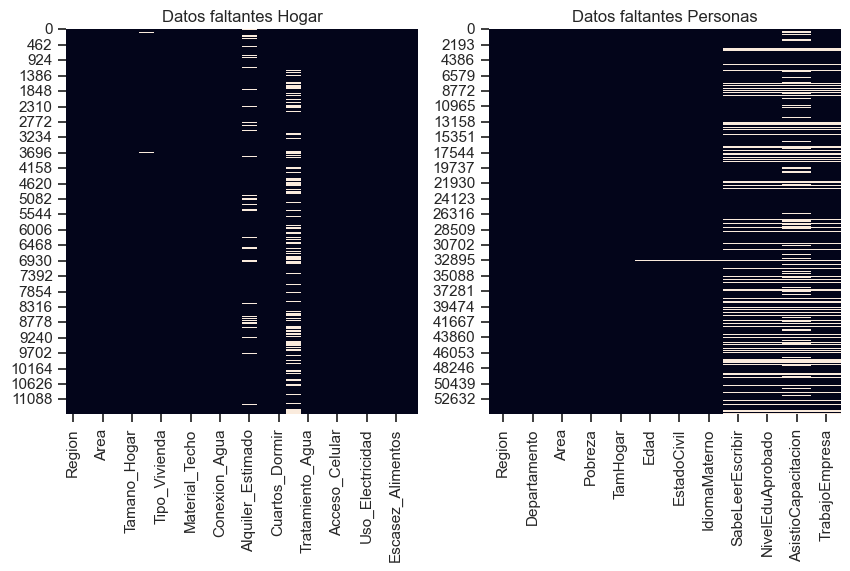

In [87]:
# Mostrar lado a lado heatmaps de los datos faltantes de ambos datasets
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(df_hogar.isnull(), cbar=False)
plt.title('Datos faltantes Hogar')

plt.subplot(1, 2, 2)
sns.heatmap(df_personas.isnull(), cbar=False)
plt.title('Datos faltantes Personas')

plt.show()

A continuación se muestra el código utilizado para rellenar los valores faltantes. Como se mencionó anteriormente, para las variables numéricas se utilizó la media de la columna. Por otro lado, para las variables categóricas se utilizó la moda de la columna.

Para esto, se utilizó la función `fillna` para rellenar los valores faltantes. Asimismo, se utilizó la función `mean` para calcular la media de las columnas numéricas. Finalmente, se utilizó la función `mode` para calcular la moda de las columnas categóricas.

A través de este procedimiento, se logró reducir a 0 la cantidad de registros con valores faltantes. Por lo tanto, se puede proceder a realizar el análisis exploratorio de datos.

In [88]:
# Rellenar valores faltantes en columnas numéricas con la media
columnas_numericas = ['Tamano_Hogar', 'Alquiler_Estimado', 'Cuartos_Hogar', 'Cuartos_Dormir']
df_hogar[columnas_numericas] = df_hogar[columnas_numericas].fillna(df_hogar[columnas_numericas].mean())

# Rellenar valores faltantes en columnas categóricas con la moda
columnas_categoricas = ['Region', 'Departamento', 'Area', 'Idioma_Principal', 'Tipo_Vivienda', 'Material_Paredes', 'Material_Techo', 'Material_Piso', 'Conexion_Agua', 'Conexion_Electricidad', 'Servicio_Agua', 'Tratamiento_Agua', 'Tipo_Servicio_Sanitario', 'Acceso_Celular', 'Acceso_Internet', 'Uso_Electricidad', 'Preocupacion_Alimentos', 'Escasez_Alimentos', 'Alimentacion_Restringida']
df_hogar[columnas_categoricas] = df_hogar[columnas_categoricas].fillna(df_hogar[columnas_categoricas].mode().iloc[0])

# Rellenar valores faltantes en la columna de edad con la media
df_personas['Edad'].fillna(df_personas['Edad'].mean(), inplace=True)

# Rellenar valores faltantes en columnas categóricas con la moda
columnas_categoricas_personas = ['Region', 'Departamento', "Pobreza",'Area', 'IdiomaMaterno', 'EstadoCivil', 'SabeLeerEscribir', 'NivelEduAprobado', 'AsistioCapacitacion', 'TrabajoEmpresa']
df_personas[columnas_categoricas_personas] = df_personas[columnas_categoricas_personas].fillna(df_personas[columnas_categoricas_personas].mode().iloc[0])

# Imprimir cantidad de registros con datos faltantes en ambos datasets
print('Registros con datos faltantes en el dataset de hogar:', df_hogar.isnull().sum().sum())
print('Registros con datos faltantes en el dataset de personas:', df_personas.isnull().sum().sum())

Registros con datos faltantes en el dataset de hogar: 0
Registros con datos faltantes en el dataset de personas: 0


##### *Análisis Univariable (10 puntos)*

Como segundo paso, se realizó un análisis univariable de las variables de interés. Para esto, se siguieron los siguientes pasos:
- Estadísticas descriptivas (media, mediana, moda).
- Distribuciones de variables importantes mediante histogramas o boxplots.

Como primer paso, se quiso obtener <font color=orange>estadísticas descriptivas de las variables de interés</font>. 

Para esto, se utilizó la función `describe` para obtener las estadísticas descriptivas de las variables numéricas. Esto permitió obtener la media, mediana, desviación estándar, mínimo, máximo, y cuartiles de las variables numéricas.

En el caso del dataset **ENCOVI_Hogares** se puede observar:


- El tamaño promedio de los hogares es de aproximadamente 4.75 personas, con una desviación estándar de 2.36, lo que indica una variabilidad moderada en el tamaño de los hogares. 

- La mayoría de los hogares tienen entre 3 y 6 miembros, como lo demuestran los valores del primer y tercer cuartil. 

- El alquiler estimado medio es de 583.93 unidades monetarias, con una desviación estándar significativa de 588.68, reflejando una amplia gama en los valores de alquiler, desde tan solo 20 hasta 20,000 unidades. Esto sugiere una gran disparidad en las condiciones de vivienda. 

- En cuanto a la estructura de las viviendas, el número medio de cuartos es de 2.25 y de cuartos para dormir es de 1.90, con la mayoría de los hogares teniendo 1 o 2 cuartos para dormir. Los valores máximos tanto para cuartos totales (15) como para cuartos para dormir (10) indican la presencia de hogares con una cantidad considerablemente alta de espacios habitables.

In [89]:
estadisticas_hogar = df_hogar[columnas_numericas].describe()
estadisticas_hogar

Tamano_Hogar  Alquiler_Estimado  Cuartos_Hogar  Cuartos_Dormir
count  11536.000000       11536.000000    11536.00000    11536.000000
mean       4.752254         583.934269        2.25078        1.895891
std        2.355452         588.681484        1.36580        1.059969
min        1.000000          20.000000        1.00000        1.000000
25%        3.000000         300.000000        1.00000        1.000000
50%        4.000000         500.000000        2.00000        2.000000
75%        6.000000         600.000000        3.00000        2.000000
max       20.000000       20000.000000       15.00000       10.000000

Por otro lado, en el caso del dataset **ENCOVI_Individuos** se puede observar:

- En el dataset de personas, se observa que el tamaño promedio de los hogares es de aproximadamente 5.92 miembros, con una desviación estándar de 2.64, lo que sugiere una variabilidad moderada en el número de personas por hogar. La mitad de los hogares tiene entre 4 y 7 miembros, como lo indican los valores de los cuartiles primero y tercero.

- En cuanto a la edad de los individuos, la media es de aproximadamente 25.63 años, con una desviación estándar cercana a 19.80 años, reflejando una amplia distribución de edades dentro de la población. Esto es consistente con una población que incluye desde recién nacidos (edad mínima de 0 años) hasta personas de edad avanzada (edad máxima de 97 años). La mediana de 20 años indica que la mitad de la población es menor de esta edad, lo que sugiere una población con una tendencia hacia individuos más jóvenes.



In [90]:
estadisticas_personas = df_personas.describe()
estadisticas_personas

TamHogar          Edad
count  54822.000000  54822.000000
mean       5.919631     25.629690
std        2.638153     19.798226
min        1.000000      0.000000
25%        4.000000     10.000000
50%        5.000000     20.000000
75%        7.000000     38.000000
max       20.000000     97.000000

Posteriormente, se procedió a <font color=orange>graficar las distribuciones de las variables de interés</font>.


En el caso del dataset de **ENCOVI_Hogares**, se puede observar que:
 
- # todo carol luis describir

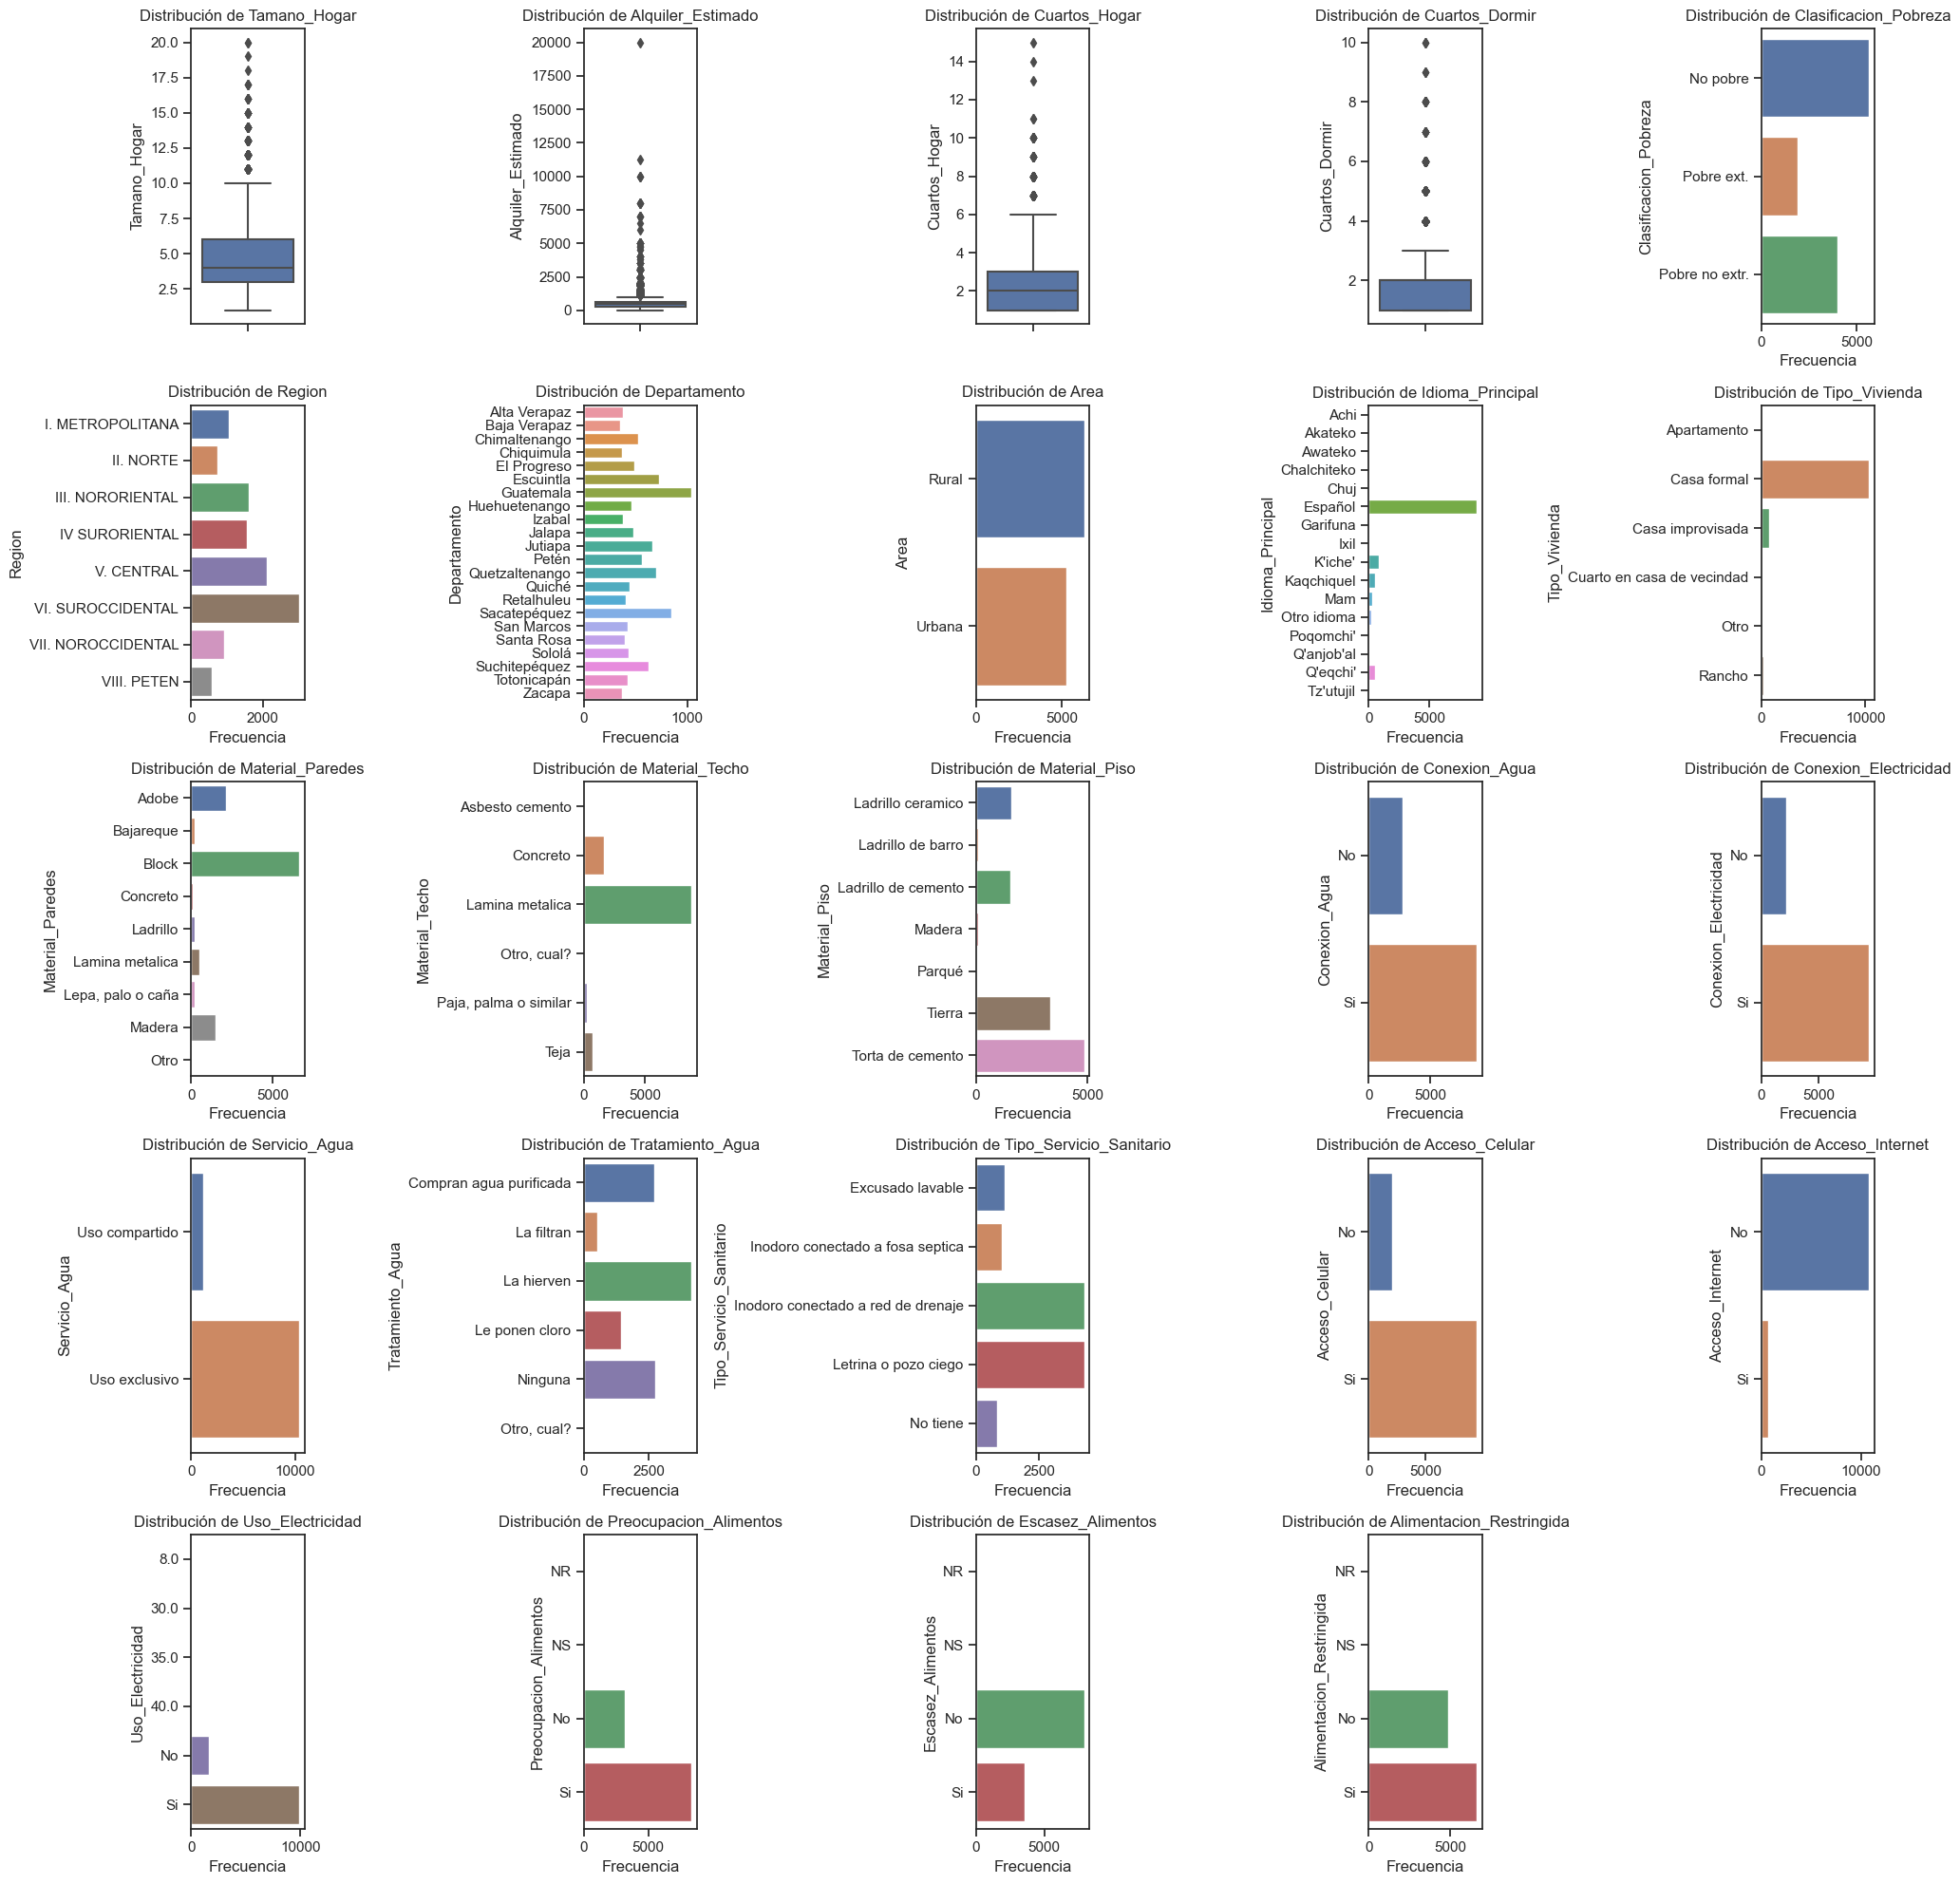

In [91]:
# DATASET HOGAR

columnas_numericas = ['Tamano_Hogar', 'Alquiler_Estimado', 'Cuartos_Hogar', 'Cuartos_Dormir']
columnas_categoricas = ['Clasificacion_Pobreza', 'Region', 'Departamento', 'Area', 'Idioma_Principal', 'Tipo_Vivienda', 'Material_Paredes', 'Material_Techo', 'Material_Piso', 'Conexion_Agua', 'Conexion_Electricidad', 'Servicio_Agua', 'Tratamiento_Agua', 'Tipo_Servicio_Sanitario', 'Acceso_Celular', 'Acceso_Internet', 'Uso_Electricidad', 'Preocupacion_Alimentos', 'Escasez_Alimentos', 'Alimentacion_Restringida']

# Configuración para una cuadrícula de 5x5
num_filas = 5
num_columnas = 5
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura según sea necesario

# Graficar las variables numéricas del dataset de hogar
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(num_filas, num_columnas, i)
    sns.boxplot(y=df_hogar[columna])
    plt.title(f'Distribución de {columna}')
    plt.ylabel(columna)

# Variables categóricas del dataset de hogar
for j, columna in enumerate(columnas_categoricas, i+1):
    plt.subplot(num_filas, num_columnas, j)
    sns.countplot(y=df_hogar[columna])
    plt.title(f'Distribución de {columna}')
    plt.xlabel('Frecuencia')
    plt.ylabel(columna)

plt.tight_layout()
plt.show()


En el caso del dataset de **ENCOVI_Personas**, se puede observar que:
 
- # todo carol luis describir

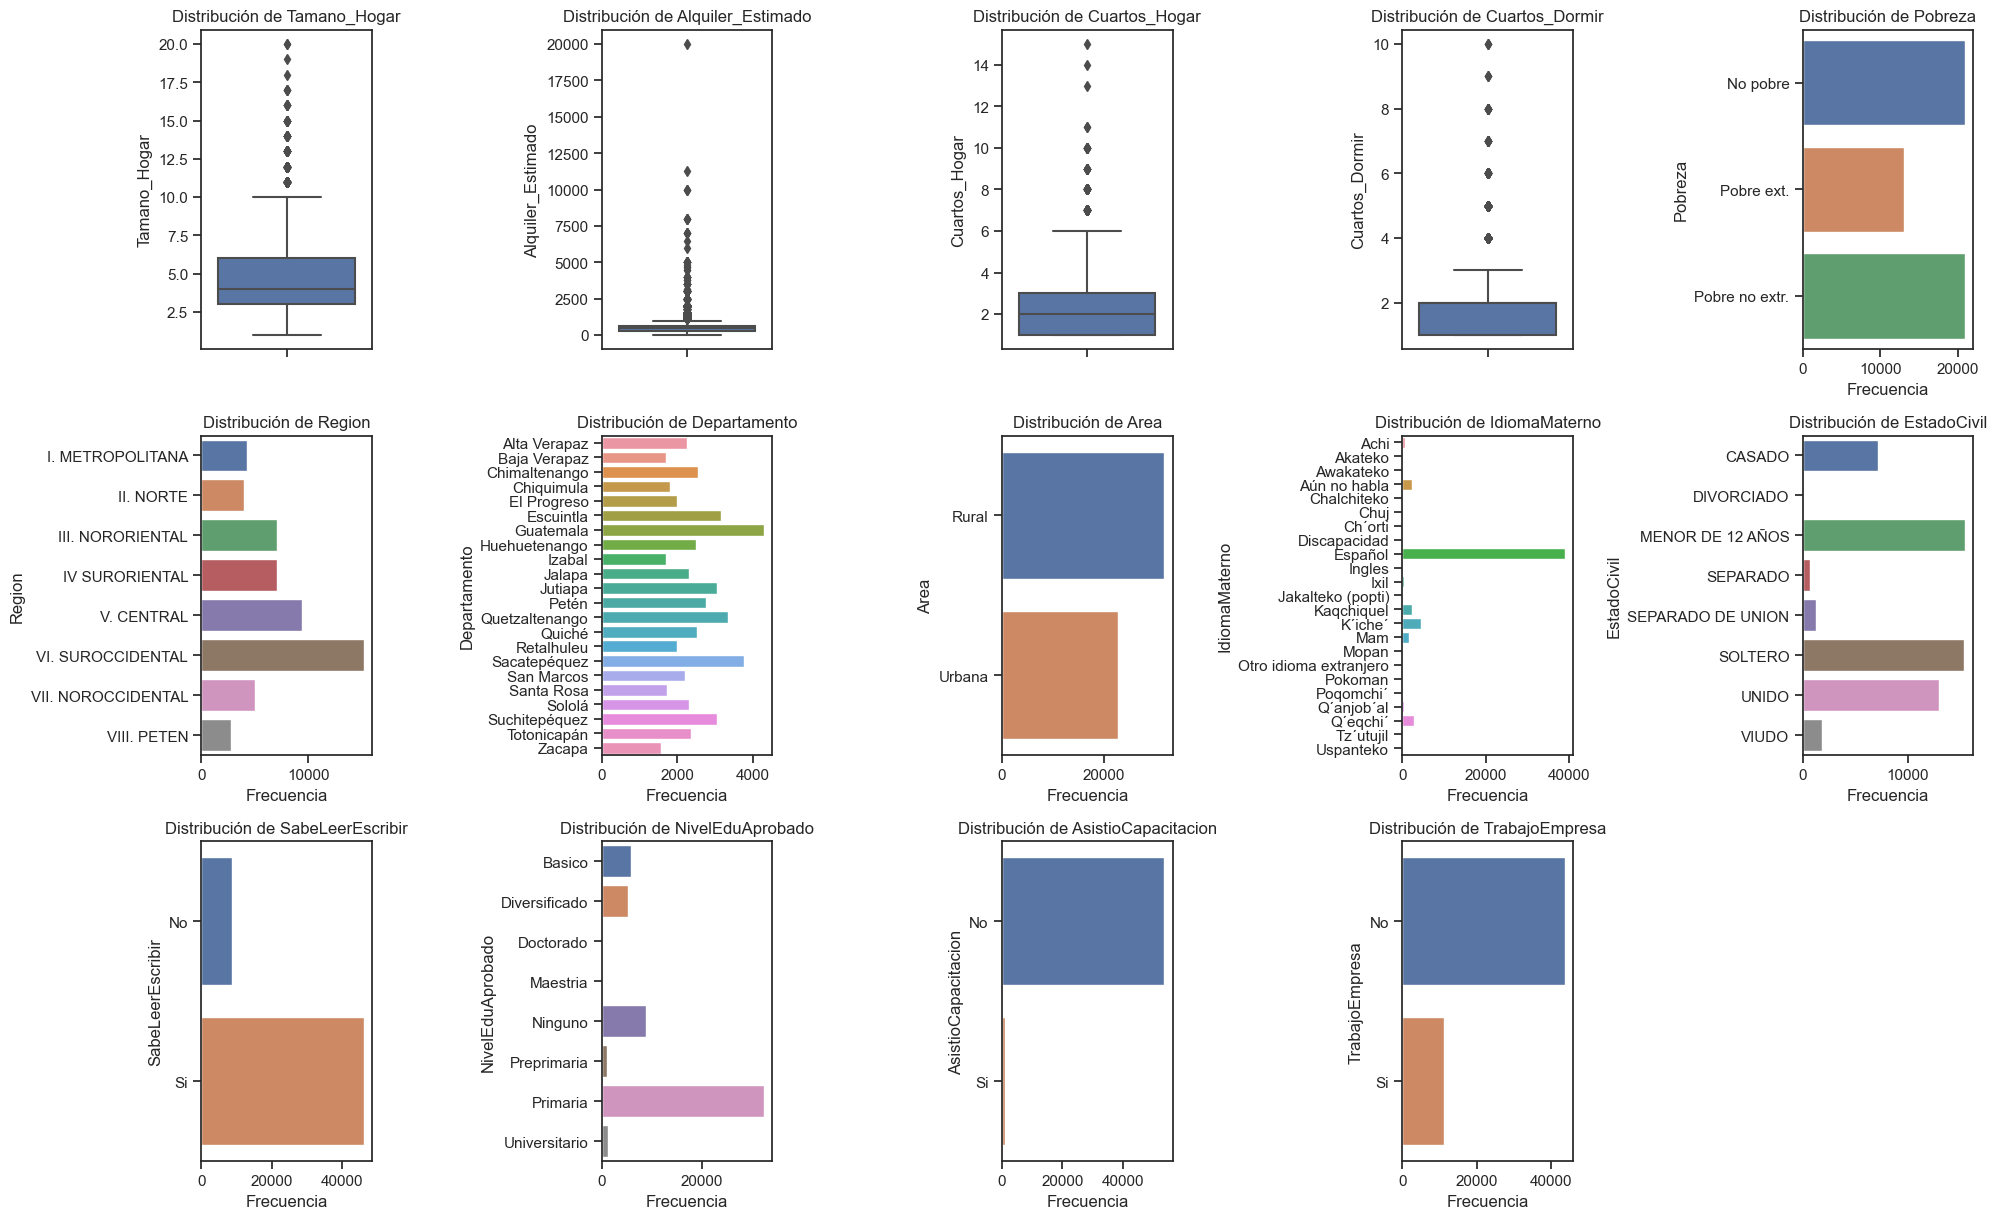

In [92]:
# DATASET PERSONA

columnas_numericas_personas = ['Edad']
columnas_categoricas_personas = ['Pobreza', 'Region', 'Departamento','Area', 'IdiomaMaterno', 'EstadoCivil', 'SabeLeerEscribir', 'NivelEduAprobado', 'AsistioCapacitacion', 'TrabajoEmpresa']

# Configuración para una cuadrícula de 5x5
num_filas = 5
num_columnas = 5
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura según sea necesario

# Graficar las variables numéricas del dataset de personas
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(num_filas, num_columnas, i)
    sns.boxplot(y=df_hogar[columna])
    plt.title(f'Distribución de {columna}')
    plt.ylabel(columna)

# Variables categóricas del dataset de personas
for j, columna in enumerate(columnas_categoricas_personas, i+1):
    plt.subplot(num_filas, num_columnas, j)
    sns.countplot(y=df_personas[columna])
    plt.title(f'Distribución de {columna}')
    plt.xlabel('Frecuencia')
    plt.ylabel(columna)

plt.tight_layout()
plt.show()


##### *Análisis Bivariable (10 puntos)*

Como tercer paso, se realizó un análisis bivariable de las variables de interés. Para esto, se seguieron los siguientes pasos:

- Correlaciones entre variables.
- Scatter plots para relaciones entre pares de variables.

Antes de realizar este análisis, fue necesario realizar un proceso de encoding para poder convertir las variables categóricas en variables numéricas. Para esto, se utilizó la función `get_dummies` para realizar el encoding de las variables categóricas.

In [93]:
df_hogar[columnas_categoricas] = df_hogar[columnas_categoricas].astype(str)
df_personas[columnas_categoricas_personas] = df_personas[columnas_categoricas_personas].astype(str)

# Creamos un LabelEncoder para cada columna categórica
label_encoders_hogar = {col: LabelEncoder() for col in columnas_categoricas}
label_encoders_personas = {col: LabelEncoder() for col in columnas_categoricas_personas}

# Recorremos las columnas categóricas y aplicamos la codificación en el DataFrame df_hogar
for col, encoder in label_encoders_hogar.items():
    df_hogar[col] = encoder.fit_transform(df_hogar[col].astype(str))

# Recorremos las columnas categóricas y aplicamos la codificación en el DataFrame df_personas
for col, encoder in label_encoders_personas.items():
    df_personas[col] = encoder.fit_transform(df_personas[col].astype(str))

Como primer paso, se quiso analizar el <font color=orange>nivel de correlación entre las variables de interés</font>. Para esto, se utilizó la función `corr` para calcular la correlación entre las variables numéricas. Posteriormente, se graficó la matriz de correlación utilizando la función `heatmap` de la librería `seaborn`.

Como se puede observar en ambos casos, existen varias variables que no se correlacionan grandemente con la variable objetivo. Por lo tanto, se puede concluir que estas variables no son relevantes para el presente estudio.

Por ejemplo, en el dataset Hogar varias variables, como Servicio_Agua, Departamento, Conexion_Agua, etc. no se correlacionan grandemente con la variable objetivo. Por lo tanto, se considera que es útil eliminar estas variables del dataset para así reducir la dimensionalidad del dataset y el ruido en los datos.

Por otro lado, el dataset de Personas también presenta variables que no se correlacionan grandemente con la variable objetivo. Por lo tanto, se considera que es útil eliminar estas variables del dataset para así reducir la dimensionalidad del dataset y el ruido en los datos. Por ejemplo Departamento y trabajoEmpresa no se correlacionan grandemente con la variable objetivo.

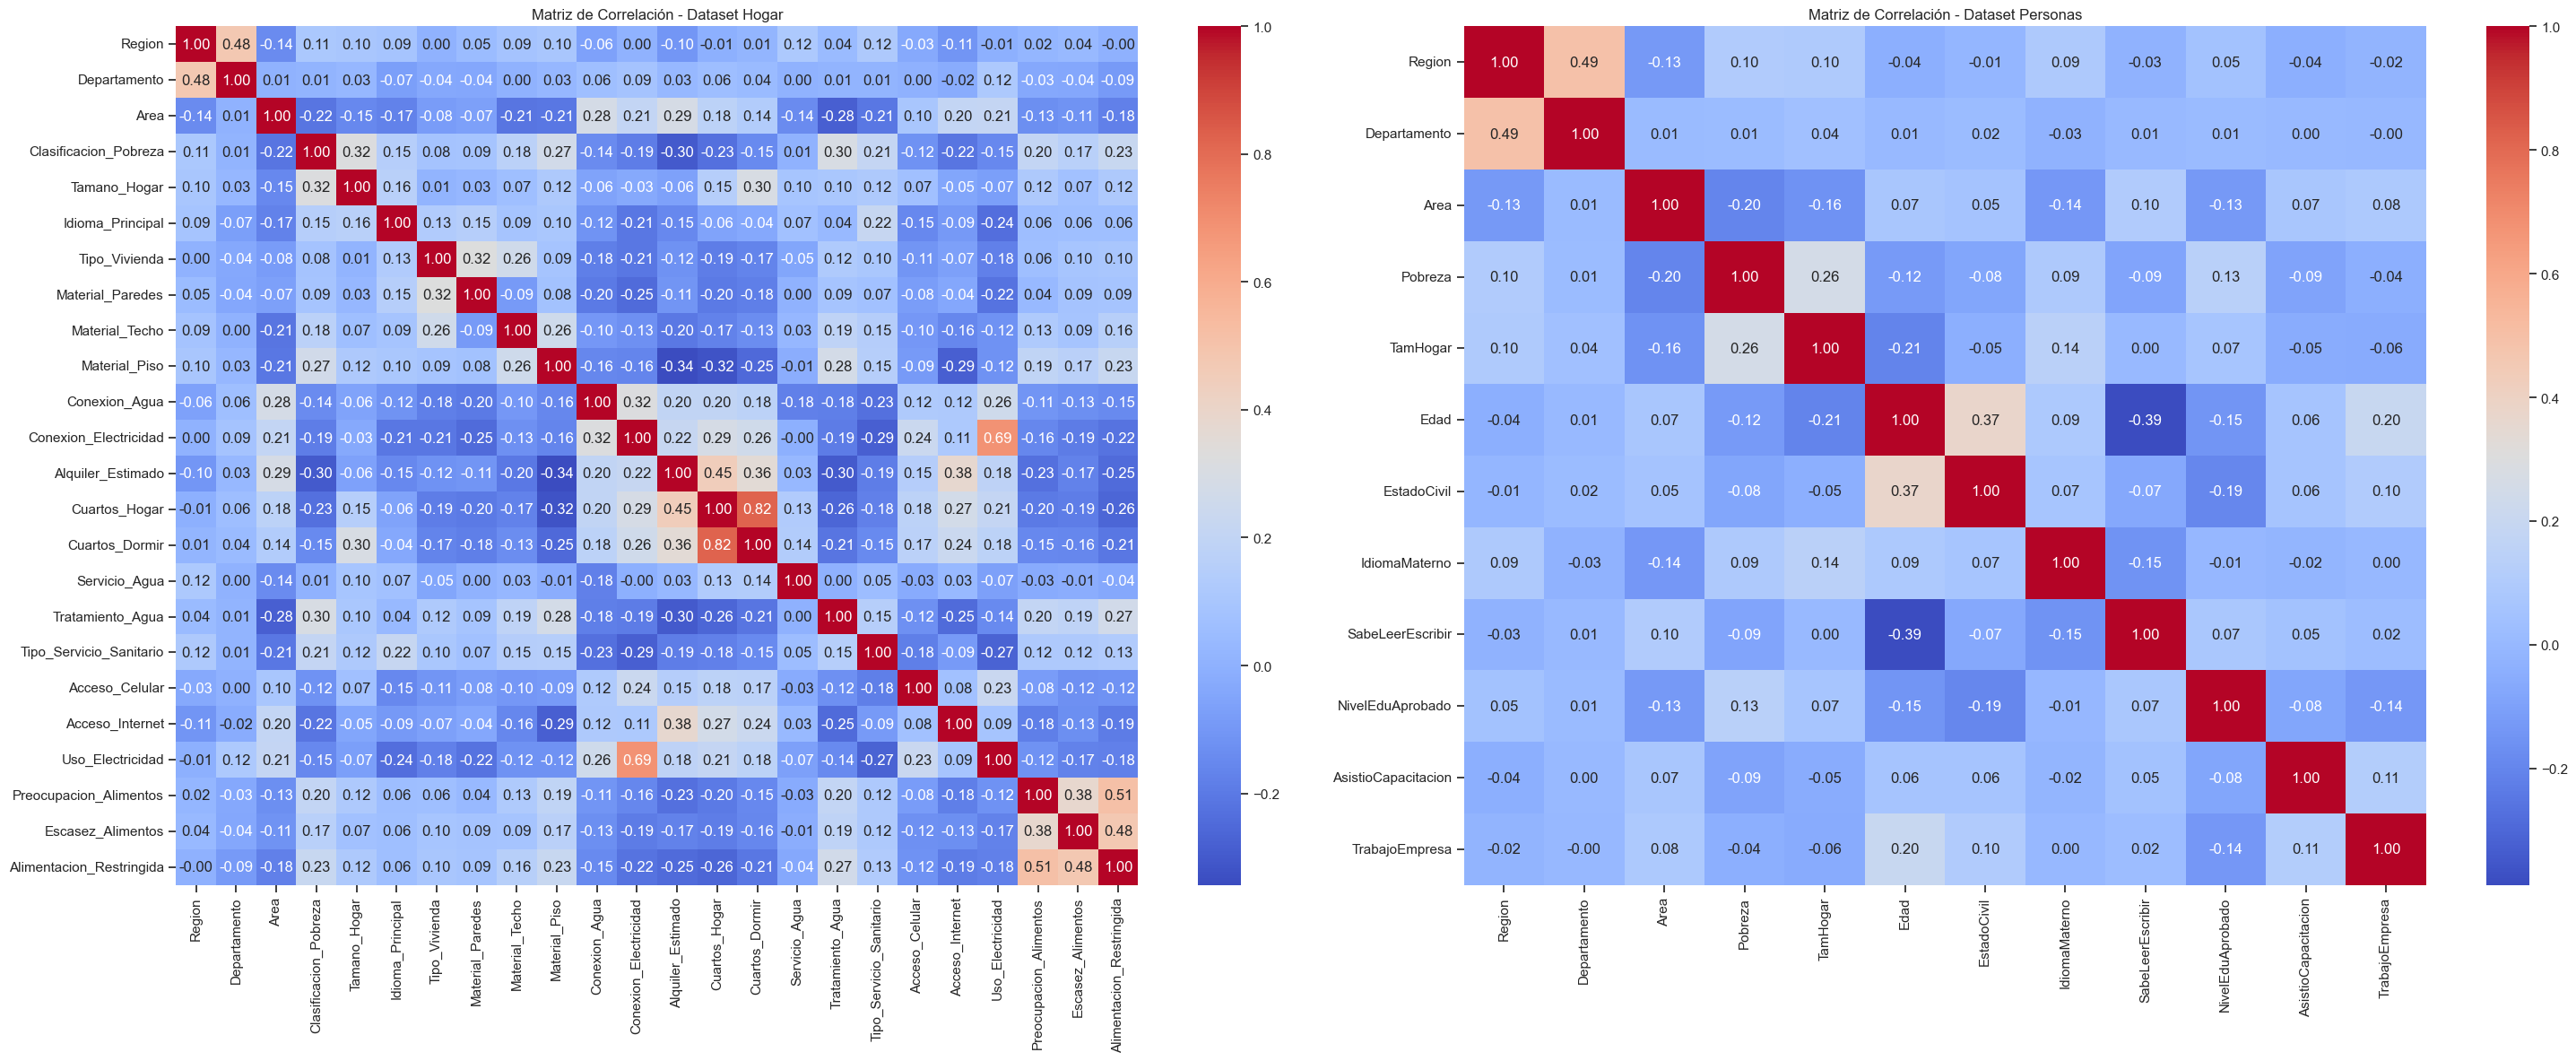

In [94]:
# Configuración de la figura para dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))

# Matriz de Correlación para el dataset de hogar
correlaciones_hogar = df_hogar.corr()
sns.heatmap(correlaciones_hogar, annot=True, fmt=".2f", cmap="coolwarm", ax=ax1)
ax1.set_title('Matriz de Correlación - Dataset Hogar')

# Matriz de Correlación para el dataset de personas
correlaciones_personas = df_personas.corr()
sns.heatmap(correlaciones_personas, annot=True, fmt=".2f", cmap="coolwarm", ax=ax2)
ax2.set_title('Matriz de Correlación - Dataset Personas')

# Ajustar el layout para evitar la superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

Como se mencionó anteriormente, se decidió eliminar las variables que no se correlacionan grandemente con la variable objetivo. Para esto, se utilizó la función `drop` para eliminar las columnas que no se correlacionan grandemente con la variable objetivo.

En el caso del dataset de **ENCOVI_Hogares**, únicamente se dejaron 11 variables. Por otro lado, en el caso del dataset de **ENCOVI_Personas**, únicamente se dejaron 9 variables.

In [95]:
# Dataset Hogar - Ordenar las correlaciones de mayor a menor con respecto a Clasificacion_Pobreza (valor absoluto)
# Dejar el top 10 de correlaciones. El resto se eliminarán del dataset

abs_correlations_hogar = abs(correlaciones_hogar)
abs_correlations_hogar = abs_correlations_hogar.sort_values('Clasificacion_Pobreza', ascending=False)

# Seleccionar las 10 correlaciones más altas
abs_correlations_hogar = abs_correlations_hogar['Clasificacion_Pobreza'][:11]

# Crear nuevo dataset con las columnas seleccionadas
df_hogar = df_hogar[abs_correlations_hogar.index]
df_hogar.head()

Clasificacion_Pobreza  Tamano_Hogar  Alquiler_Estimado  Tratamiento_Agua  \
0                      0           3.0        3000.000000                 0   
1                      0           3.0         583.934269                 0   
2                      2          18.0         583.934269                 0   
3                      2           6.0        1000.000000                 4   
4                      0           3.0        4000.000000                 0   

   Material_Piso  Cuartos_Hogar  Alimentacion_Restringida  Acceso_Internet  \
0              0            5.0                         2                0   
1              0            3.0                         2                0   
2              2            4.0                         2                1   
3              2            1.0                         2                0   
4              0            6.0                         2                1   

   Area  Tipo_Servicio_Sanitario  Preocupacion_Alimentos  
0     1                        2                       2  
1     1                        2                       3  
2     1                        2                       3  
3     1                        2                       3  
4     1                        2                       3

In [96]:
# Dataset Personas - Ordenar las correlaciones de mayor a menor con respecto a Pobreza (valor absoluto)
# Dejar el top 8 de correlaciones. El resto se eliminarán del dataset

abs_correlations_personas = abs(correlaciones_personas)
abs_correlations_personas = abs_correlations_personas.sort_values('Pobreza', ascending=False)

# Seleccionar las 8 correlaciones más altas
abs_correlations_personas = abs_correlations_personas['Pobreza'][:9]

# Crear nuevo dataset con las columnas seleccionadas
df_personas = df_personas[abs_correlations_personas.index]
df_personas.head()

Pobreza  TamHogar  Area  NivelEduAprobado  Edad  Region  \
0        0       3.0     1                 7  60.0       0   
1        0       3.0     1                 1  55.0       0   
2        0       3.0     1                 7  40.0       0   
3        0       3.0     1                 6  52.0       0   
4        0       3.0     1                 1  30.0       0   

   AsistioCapacitacion  IdiomaMaterno  SabeLeerEscribir  
0                    0              8                 1  
1                    0              8                 1  
2                    0              8                 1  
3                    0              8                 1  
4                    0              8                 1

Como segundo paso del análisis bivariable, se procedió a <font color=orange>graficar las relaciones entre pares de variables</font>. Para esto, se utilizó la función `scatterplot` de la librería `seaborn` para graficar las relaciones entre pares de variables.

En el caso del dataset df_hogar, al realizar scatterplots de las variables, se puede observar que:

- fasd

# todo carol luis describir scatterplots y mencionar cosas interesantes

c:\Users\carev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


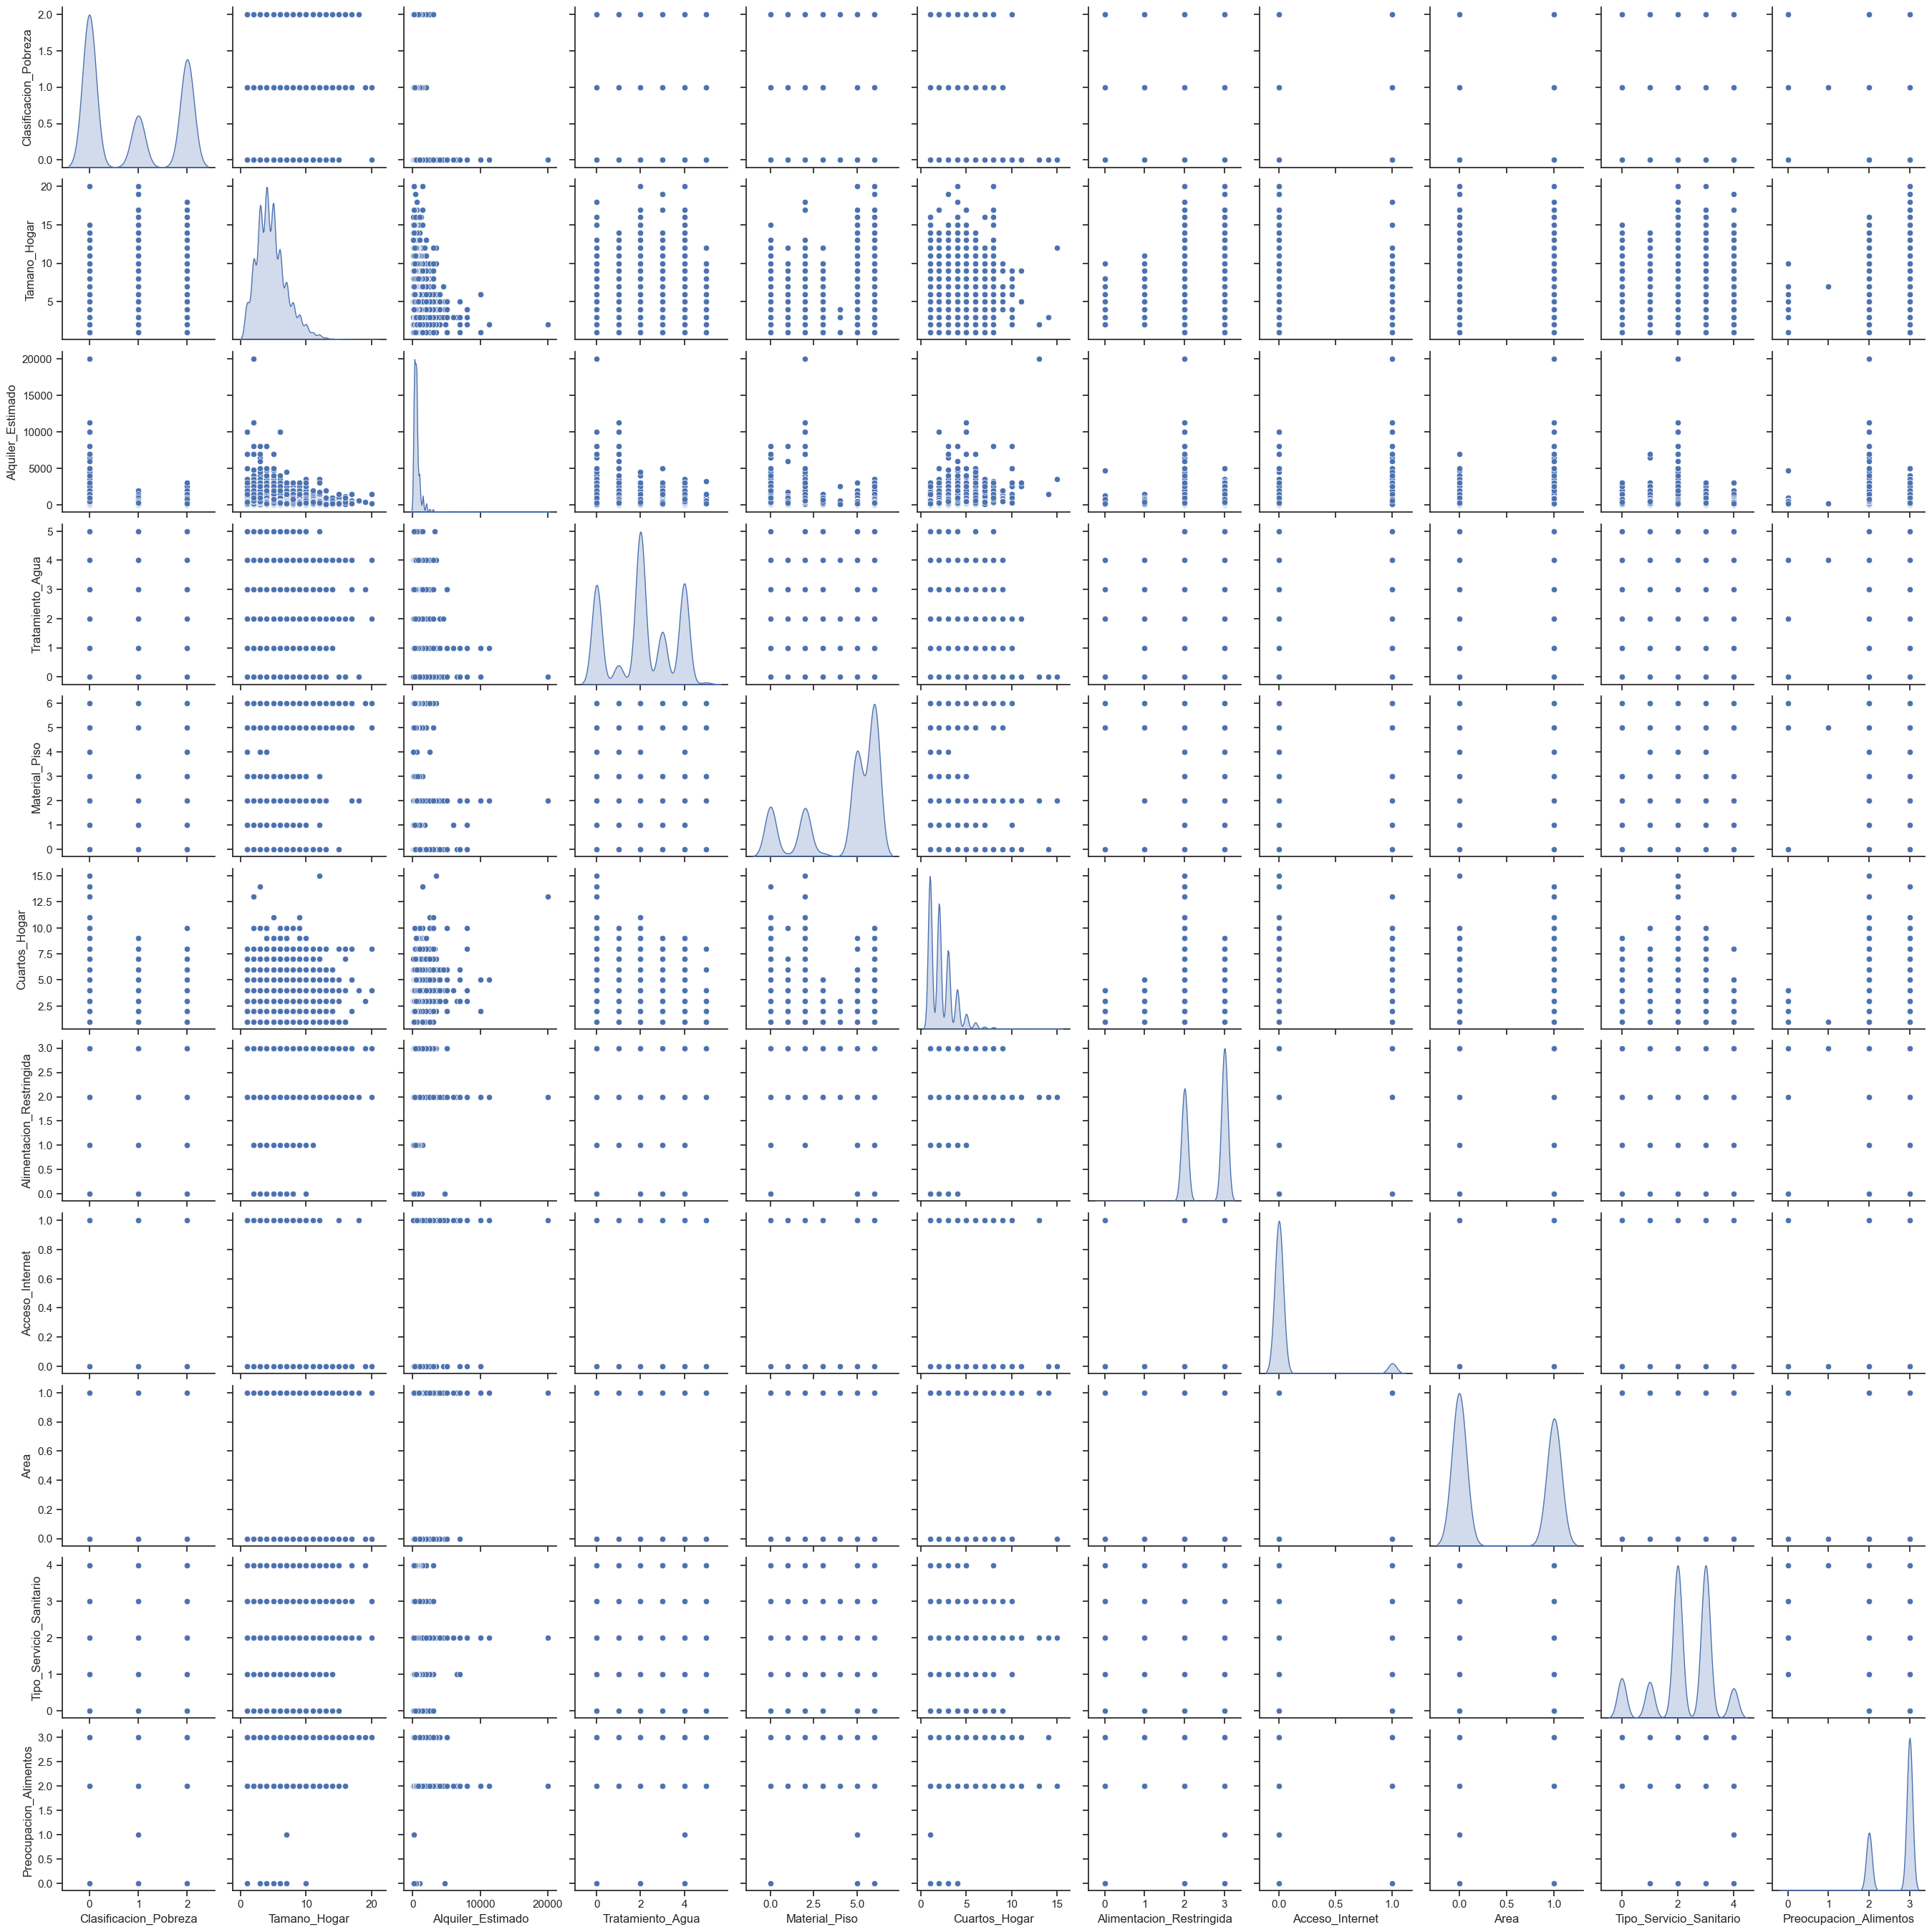

In [97]:
# SCATTERPLOT DF_HOGAR

sns.set(style="ticks")
sns.pairplot(df_hogar, diag_kind="kde")
plt.show()

Por otro lado, cabe destacar que con df_personas se identificó que:
- fasd

# todo carol luis describir scatterplots y mencionar cosas interesantes

c:\Users\carev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


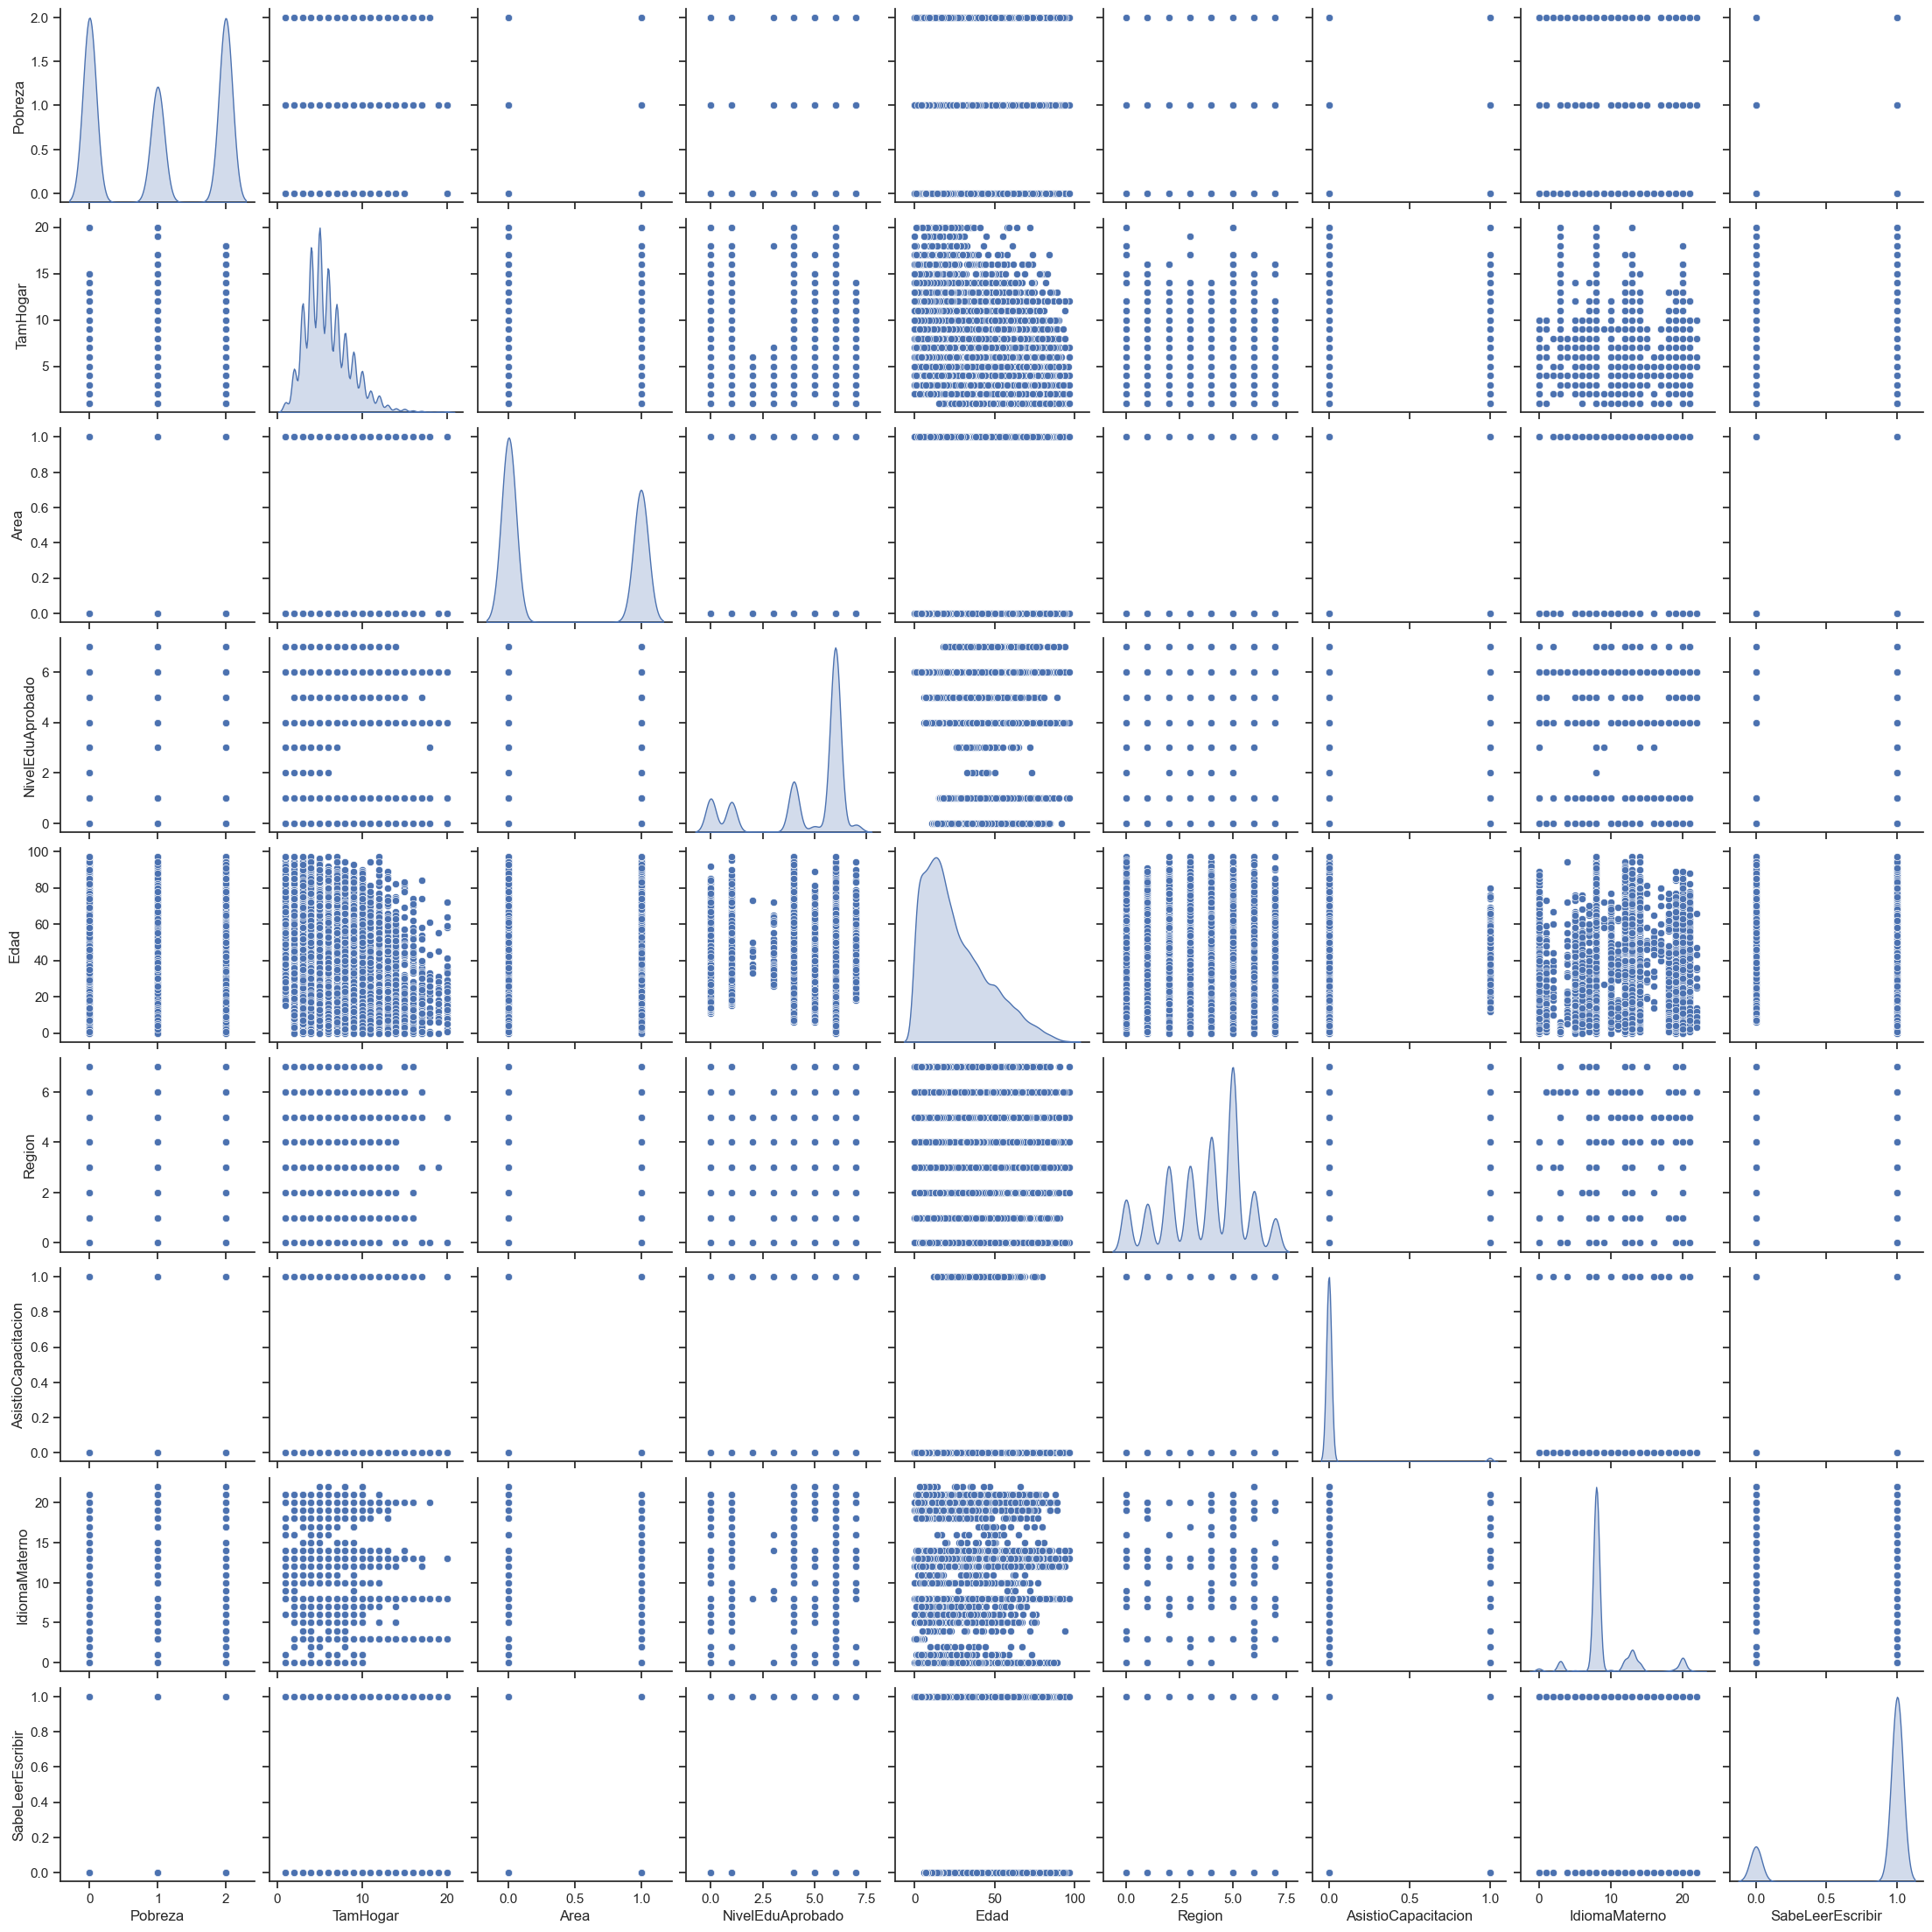

In [98]:
# SCATTERPLOT DF_PERSONAS

sns.set(style="ticks")
sns.pairplot(df_personas, diag_kind="kde")
plt.show()

##### *Visualización de Datos (10 puntos)*

Como cuarto y último paso del análisis exploratorio, se decidió visualizar los datos utilizando diferentes tipos de gráficos. 

Para esto, se utilizó Pandas Profiling para generar un reporte de los datasets. **PARA VER LOS REPORTES, ABRIR EL IPYNB DIRECTAMENTE**

A continuación se presenta el reporte de Pandas Profiling para el dataset de hogares. En este caso, se puede observar que el reporte contiene información sobre las variables numéricas y categóricas. 

# todo carol luis describir reporte de pandas profiling

In [99]:
# Utilizar pandas profiling para generar reporte de los datasets

# Generar reporte para el dataset de hogar
profile = ProfileReport(df_hogar, title='Pandas Profiling Report - Dataset Hogar')
profile.to_file(output_file="Pandas Profiling Report - Dataset Hogar.html")

# Mostar el reporte en el notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Por otro lado, a continuación se presenta el reporte de Pandas Profiling para el dataset de personas. Nuevamente, se puede observar que el reporte contiene información sobre las variables numéricas y categóricas.

# todo carol luis describir reporte de pandas profiling

In [100]:
# Utilizar pandas profiling para generar reporte de los datasets

# Generar reporte para el dataset de hogar
profile = ProfileReport(df_personas, title='Pandas Profiling Report - Dataset Personas')
profile.to_file(output_file="Pandas Profiling Report - Dataset Personas.html")

# Mostar el reporte en el notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---------

#### **Parte 2: Modelado y Pruebas (45 Puntos)**

Para la segunda parte, se procedió a preparar los datos para el modelado. Asimismo, se procedió a dividir los datos en un conjunto de entrenamiento y un conjunto de prueba. Finalmente, se desarolló los modelos de aprendizaje automático.

##### *Preparación de Datos (5 puntos)*

Para la preparación de los datos, se siguieron los siguientes pasos:
- Dividir el conjunto de datos en entrenamiento y prueba.
- Estandarización o normalización de variables si es necesario.


En este caso, se decidió dividir los datos en un conjunto de entrenamiento y un conjunto de prueba. Para esto, se utilizó la función `train_test_split` de la librería `sklearn` para dividir los datos en un conjunto de entrenamiento y un conjunto de prueba.

In [101]:
# Dividir conjuntos de datos en entrenamiento y validación

# Dividir el dataset de hogar en entrenamiento y validación
X_hogar = df_hogar.drop(columns=['Clasificacion_Pobreza'])
y_hogar = df_hogar['Clasificacion_Pobreza']

X_train_hogar, X_test_hogar, y_train_hogar, y_test_hogar = train_test_split(X_hogar, y_hogar, test_size=0.2, random_state=42)

# Dividir el dataset de personas en entrenamiento y validación
X_personas = df_personas.drop(columns=['Pobreza'])
y_personas = df_personas['Pobreza']

X_train_personas, X_test_personas, y_train_personas, y_test_personas = train_test_split(X_personas, y_personas, test_size=0.2, random_state=42)

En este caso, **no se decidió estandarizar o normalizar las variables debido a que se cree que no es necesario**. Esto considerando que la mayoría de variables son categóricas y fueron codificadas utilizando one-hot encoding. Por lo tanto, no se considera necesario estandarizar o normalizar las variables.

##### *Construcción del Modelo (20 puntos)*

Para la construcción del modelo, se siguieron los siguientes pasos:
- Elegir un modelo de aprendizaje automático adecuado para la tarea.
- Justificar la elección del modelo.
- Entrenar el modelo con el conjunto de datos.

*Selección de Modelos*
- En este caso, en ambos casos se escogió utilizar una Feed Forward Neural Network (FFNN). Se escogió este tipo de red neuronal debido a su capacidad para identificar patrones complejos y realizar tareas de clasificación y predicción en datos. Esto especialmente considerando que en ambos casos se busca predecir una variable categórica.

*Justificación de la Elección del Modelos*
- Como se mencionó anteriormente, las Feed Forward Neural Networks (FFNN) son capaces de captar y modelar correlaciones y patrones complejos en los datos. Las FFNN, al estar compuestas de múltiples capas y nodos, tienen la capacidad de aprender representaciones no lineales, lo que es crucial cuando las relaciones entre las características no son lineales o son de alta dimensionalidad, como a menudo sucede en los datos socioeconómicos.
- Asimismo, cabe destacar que este modelo es relativamente fácil de entrenar y no requiere de mucho tiempo de entrenamiento. Esto especialmente considerando que los datasets  son muy grandes. Por lo tanto, se considera que este modelo es adecuado para el presente estudio.  
- Finalmente, debido a que no se está manejando series de tiempo, imágenes, o texto, se considera que FFNNs es el modelo de deep learning más adecuado para el presente estudio.


Al haber establecido el modelo a utilizar, se procedió programar el modelo. Para esto, se utilizó la librería `keras`.

Como se puede observar, en ambos casos se utilizó un modelo secuencial. Más específicamente, se utilizó un modelo secuencial con 2 capas ocultas. En este caso, se utilizó una función de activación `relu` para las capas ocultas y una función de activación `softmax` para la capa de salida. Asimismo, se utilizó una función de pérdida `categorical_crossentropy` y un optimizador `adam` para entrenar el modelo.

En el caso del modelo de hogares, se puede observar que presenta un val

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np

# Suponiendo que df_hogar y df_personas ya están cargados en DataFrames de pandas

# Dividir los datos en características y etiquetas
X_hogar = df_hogar.drop(columns=['Clasificacion_Pobreza'])
y_hogar = df_hogar['Clasificacion_Pobreza']
X_personas = df_personas.drop(columns=['Pobreza'])
y_personas = df_personas['Pobreza']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_hogar, X_test_hogar, y_train_hogar, y_test_hogar = train_test_split(X_hogar, y_hogar, test_size=0.2, random_state=42)
X_train_personas, X_test_personas, y_train_personas, y_test_personas = train_test_split(X_personas, y_personas, test_size=0.2, random_state=42)

# Estandarizar los datos (centrar a la media y escalar a la varianza unitaria)
scaler_hogar = StandardScaler()
X_train_hogar = scaler_hogar.fit_transform(X_train_hogar)
X_test_hogar = scaler_hogar.transform(X_test_hogar)

scaler_personas = StandardScaler()
X_train_personas = scaler_personas.fit_transform(X_train_personas)
X_test_personas = scaler_personas.transform(X_test_personas)

# Convertir etiquetas a categorías one-hot
y_train_hogar_one_hot = to_categorical(y_train_hogar)
y_test_hogar_one_hot = to_categorical(y_test_hogar)
y_train_personas_one_hot = to_categorical(y_train_personas)
y_test_personas_one_hot = to_categorical(y_test_personas)

# Balancear los conjuntos de entrenamiento usando SMOTE
smote = SMOTE()
X_train_hogar, y_train_hogar_one_hot = smote.fit_resample(X_train_hogar, y_train_hogar_one_hot)
X_train_personas, y_train_personas_one_hot = smote.fit_resample(X_train_personas, y_train_personas_one_hot)


# Construcción del modelo de red neuronal para el conjunto de datos de hogar
modelo_hogar = Sequential()
modelo_hogar.add(Dense(128, input_dim=X_train_hogar.shape[1], activation='relu'))  # Capa de entrada
modelo_hogar.add(Dense(64, activation='relu'))  # Capa oculta
modelo_hogar.add(Dense(32, activation='relu'))  # Capa oculta
modelo_hogar.add(Dense(16, activation='relu'))  # Capa oculta
modelo_hogar.add(Dense(8, activation='relu'))  # Capa oculta
modelo_hogar.add(Dense(3, activation='softmax'))  # Capa de salida

# Compilar el modelo
modelo_hogar.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Configurar el Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Entrenar el modelo con Early stopping y Dropout
modelo_hogar.fit(
    X_train_hogar, 
    y_train_hogar_one_hot, 
    validation_data=(X_test_hogar, y_test_hogar_one_hot), 
    epochs=100, 
    batch_size=32, 
    callbacks=[es]
)


Epoch 1/100
429/429 [==============================] - 3s 3ms/step - loss: 0.7782 - accuracy: 0.6400 - val_loss: 0.7041 - val_accuracy: 0.6573
Epoch 2/100
429/429 [==============================] - 1s 2ms/step - loss: 0.6865 - accuracy: 0.6810 - val_loss: 0.6889 - val_accuracy: 0.6568
Epoch 3/100
429/429 [==============================] - 1s 2ms/step - loss: 0.6775 - accuracy: 0.6880 - val_loss: 0.7023 - val_accuracy: 0.6599
Epoch 4/100
429/429 [==============================] - 1s 2ms/step - loss: 0.6727 - accuracy: 0.6893 - val_loss: 0.6912 - val_accuracy: 0.6555
Epoch 5/100
429/429 [==============================] - 1s 2ms/step - loss: 0.6654 - accuracy: 0.6917 - val_loss: 0.7018 - val_accuracy: 0.6521
Epoch 6/100
429/429 [==============================] - 1s 2ms/step - loss: 0.6619 - accuracy: 0.6927 - val_loss: 0.7053 - val_accuracy: 0.6516
Epoch 7/100
429/429 [==============================] - 1s 2ms/step - loss: 0.6556 - accuracy: 0.6991 - val_loss: 0.7424 - val_accuracy: 0.6417

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np


# Duplicate the dataframes
df_hogar = pd.concat([df_hogar] * 10, ignore_index=True)
df_personas = pd.concat([df_personas] * 10, ignore_index=True)

# Calcular la matriz de correlación para el conjunto de datos hogar
correlation_matrix_hogar = df_hogar.corr().abs()

# Seleccionar la correlación con la variable objetivo para hogar
correlation_with_target_hogar = correlation_matrix_hogar['Clasificacion_Pobreza']

# Identificar las columnas con una correlación por debajo del umbral para hogar
low_correlation_features_hogar = correlation_with_target_hogar[correlation_with_target_hogar < 0.1].index.tolist()

# Eliminar estas columnas del DataFrame de hogar
df_hogar_reduced = df_hogar.drop(columns=low_correlation_features_hogar)

# Calcular la matriz de correlación para el conjunto de datos personas
correlation_matrix_personas = df_personas.corr().abs()

# Seleccionar la correlación con la variable objetivo para personas
correlation_with_target_personas = correlation_matrix_personas['Pobreza']

# Identificar las columnas con una correlación por debajo del umbral para personas
low_correlation_features_personas = correlation_with_target_personas[correlation_with_target_personas < 0.1].index.tolist()

# Eliminar estas columnas del DataFrame de personas
df_personas_reduced = df_personas.drop(columns=low_correlation_features_personas)


# Dividir los datos en características y etiquetas
X_hogar = df_hogar_reduced.drop(columns=['Clasificacion_Pobreza'])
y_hogar = df_hogar_reduced['Clasificacion_Pobreza']
X_personas = df_personas_reduced.drop(columns=['Pobreza'])
y_personas = df_personas_reduced['Pobreza']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_hogar, X_test_hogar, y_train_hogar, y_test_hogar = train_test_split(X_hogar, y_hogar, test_size=0.2, random_state=42)
X_train_personas, X_test_personas, y_train_personas, y_test_personas = train_test_split(X_personas, y_personas, test_size=0.2, random_state=42)

# Estandarizar los datos (centrar a la media y escalar a la varianza unitaria)
scaler_hogar = StandardScaler()
X_train_hogar = scaler_hogar.fit_transform(X_train_hogar)
X_test_hogar = scaler_hogar.transform(X_test_hogar)

scaler_personas = StandardScaler()
X_train_personas = scaler_personas.fit_transform(X_train_personas)
X_test_personas = scaler_personas.transform(X_test_personas)

# Convertir etiquetas a categorías one-hot
y_train_hogar_one_hot = to_categorical(y_train_hogar)
y_test_hogar_one_hot = to_categorical(y_test_hogar)
y_train_personas_one_hot = to_categorical(y_train_personas)
y_test_personas_one_hot = to_categorical(y_test_personas)

# Balancear los conjuntos de entrenamiento usando SMOTE
smote = SMOTE()
X_train_hogar, y_train_hogar_one_hot = smote.fit_resample(X_train_hogar, y_train_hogar_one_hot)
X_train_personas, y_train_personas_one_hot = smote.fit_resample(X_train_personas, y_train_personas_one_hot)


# Construcción del modelo de red neuronal para el conjunto de datos de hogar
modelo_hogar = Sequential()
modelo_hogar.add(Dense(256, input_dim=X_train_hogar.shape[1], activation='relu'))  # Capa de entrada
modelo_hogar.add(Dense(128, activation='relu'))  # Capa oculta
modelo_hogar.add(Dense(64, activation='relu'))  # Capa oculta
modelo_hogar.add(Dense(32, activation='relu'))  # Capa oculta
modelo_hogar.add(Dense(16, activation='relu'))  # Capa oculta
modelo_hogar.add(Dense(8, activation='relu'))  # Capa oculta
modelo_hogar.add(Dense(3, activation='softmax'))  # Capa de salida

# Compilar el modelo
modelo_hogar.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Configurar el Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Entrenar el modelo con Early stopping y Dropout
modelo_hogar.fit(
    X_train_hogar, 
    y_train_hogar_one_hot, 
    validation_data=(X_test_hogar, y_test_hogar_one_hot), 
    epochs=100, 
    batch_size=32, 
    callbacks=[es]
)


Epoch 1/100
844/844 [==============================] - 4s 3ms/step - loss: 0.7091 - accuracy: 0.6669 - val_loss: 0.6658 - val_accuracy: 0.6745
Epoch 2/100
844/844 [==============================] - 3s 3ms/step - loss: 0.6748 - accuracy: 0.6859 - val_loss: 0.7068 - val_accuracy: 0.6466
Epoch 3/100
844/844 [==============================] - 2s 2ms/step - loss: 0.6644 - accuracy: 0.6898 - val_loss: 0.6794 - val_accuracy: 0.6776
Epoch 4/100
844/844 [==============================] - 2s 2ms/step - loss: 0.6523 - accuracy: 0.6922 - val_loss: 0.6731 - val_accuracy: 0.6804
Epoch 5/100
844/844 [==============================] - 2s 2ms/step - loss: 0.6397 - accuracy: 0.6976 - val_loss: 0.6612 - val_accuracy: 0.6797
Epoch 6/100
844/844 [==============================] - 2s 2ms/step - loss: 0.6271 - accuracy: 0.7097 - val_loss: 0.6773 - val_accuracy: 0.6778
Epoch 7/100
844/844 [==============================] - 2s 2ms/step - loss: 0.6165 - accuracy: 0.7141 - val_loss: 0.6495 - val_accuracy: 0.6845

In [104]:
# imprimir para ver el balanceo de la variable objetivo para contar cuantos hay de cada uno
print(df_hogar['Clasificacion_Pobreza'].value_counts())

print(df_personas['Pobreza'].value_counts())

0    5639
2    3989
1    1908
Name: Clasificacion_Pobreza, dtype: int64
0    20892
2    20848
1    13082
Name: Pobreza, dtype: int64
